In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# input
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']]

# output
y=df['Outcome']


<Axes: xlabel='Outcome', ylabel='count'>

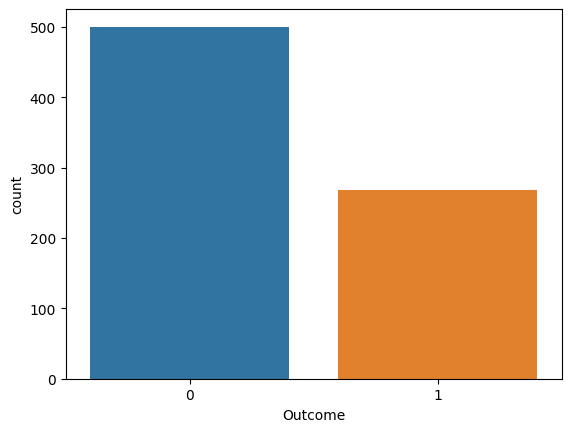

In [5]:
sns.countplot(x=y)

In [6]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
# cross validation
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [9]:
print("original ",x.shape)
print("train ",x_train.shape)
print("test ",x_test.shape)

original  (768, 8)
train  (576, 8)
test  (192, 8)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier(5)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
pred=knn.predict(x_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

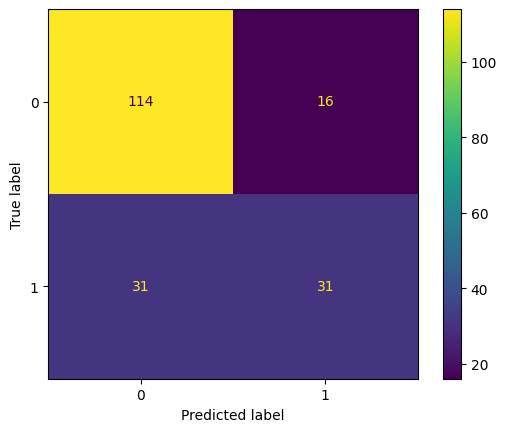

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [17]:
import matplotlib.pyplot as plt
error=[]
for k in range (1,41):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

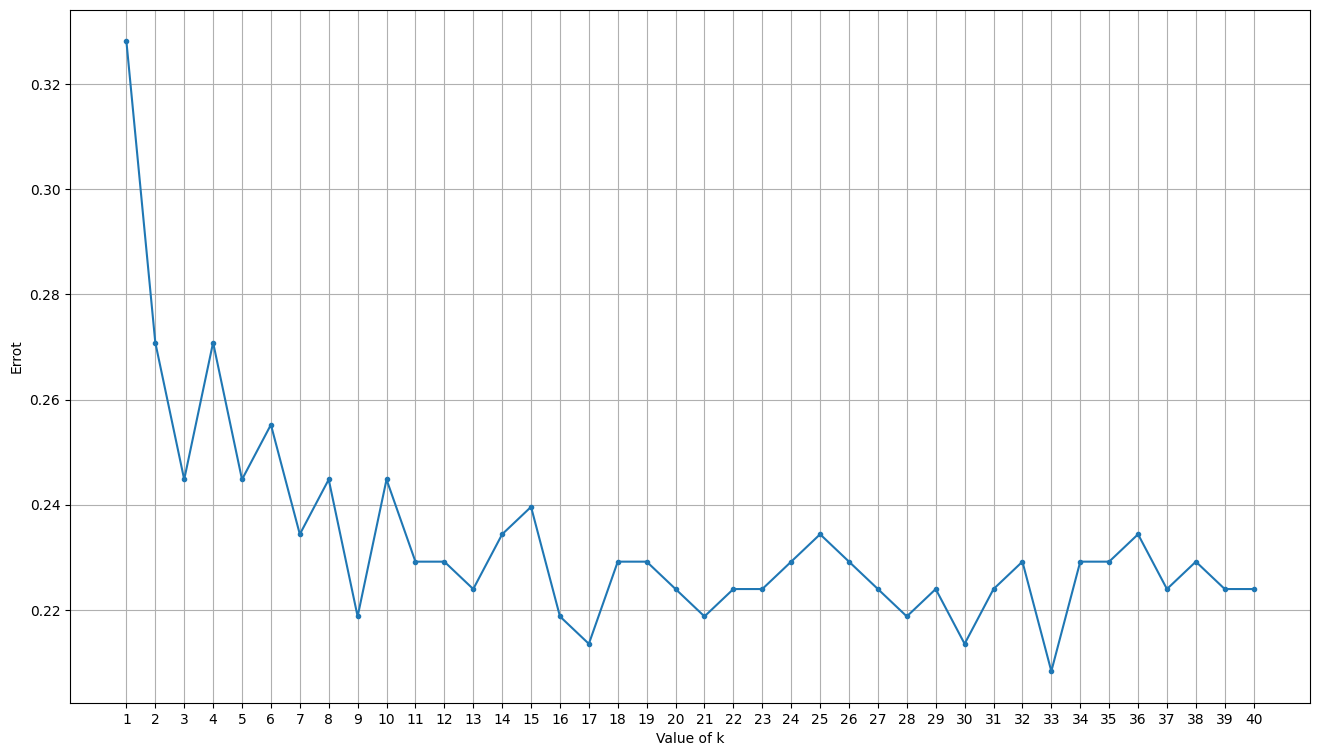

In [18]:
plt.figure(figsize=(16,9))
plt.xlabel("Value of k")
plt.ylabel("Errot")
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker=".")

In [19]:
knn=KNeighborsClassifier(33)
knn.fit(x_train,y_train)
finalPredict=knn.predict(x_test)

In [20]:
print("accuracy_score ",accuracy_score(y_test,finalPredict))
print("report \n",classification_report(y_test,finalPredict))

accuracy_score  0.7916666666666666
report 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192



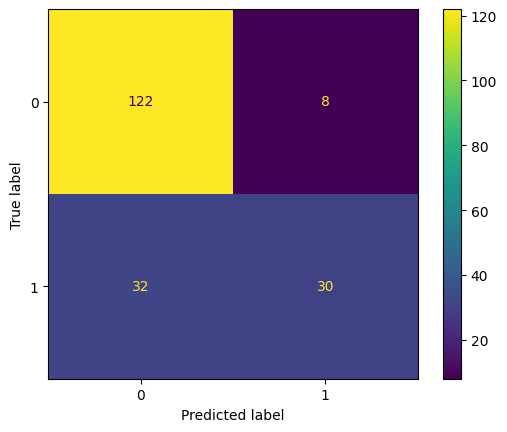

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,finalPredict)